In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('MSFT' , start="2015-01-01", end="2024-12-31" , auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.998695,40.563262,39.810509,39.913156,27913900
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900
2015-01-06,39.049210,39.990153,38.955115,39.673654,36447900
2015-01-07,39.545334,39.742076,38.912337,39.331483,29114100
2015-01-08,40.708702,40.845567,39.964501,39.990162,29645200
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647369,437.916355,432.527071,432.985301,7164500


In [5]:
data.isnull().sum()

Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

In [6]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

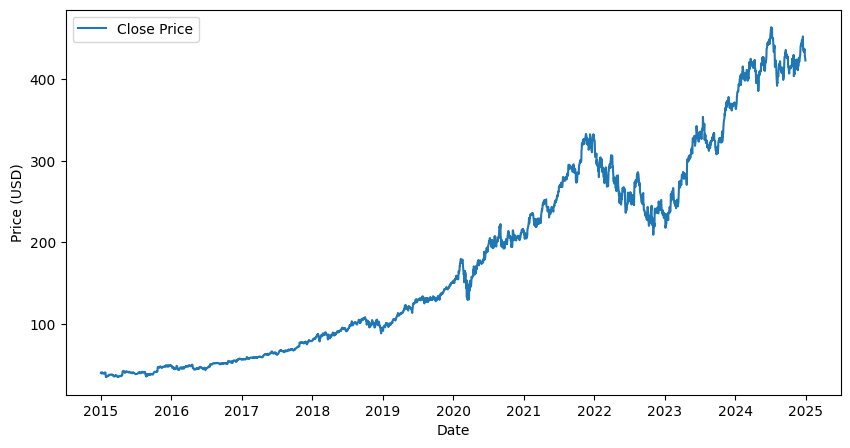

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [8]:
data.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [9]:
data['rolling_mean_close'] = data['Close'].rolling(window=20).mean()

In [10]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,
2015-01-02,39.998695,40.563262,39.810509,39.913156,27913900,NaN
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900,NaN
2015-01-06,39.049210,39.990153,38.955115,39.673654,36447900,NaN
2015-01-07,39.545334,39.742076,38.912337,39.331483,29114100,NaN
2015-01-08,40.708702,40.845567,39.964501,39.990162,29645200,NaN
...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745
2024-12-24,437.647369,437.916355,432.527071,432.985301,7164500,437.669810


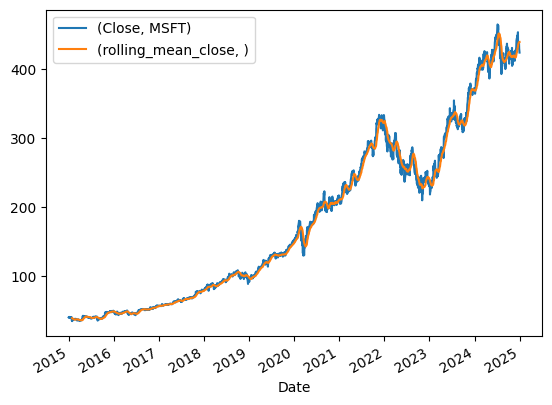

In [11]:
data[['Close' , 'rolling_mean_close']].plot()
plt.legend()
plt.show()

In [12]:
data['RSI'] = 100 - (100 / (1 + data['Close'].pct_change().rolling(window=14).apply(lambda x: (x[x>0].sum()/abs(x[x<0].sum())) if abs(x[x<0].sum())>0 else 0)))

In [13]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,
2015-01-02,39.998695,40.563262,39.810509,39.913156,27913900,NaN,NaN
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900,NaN,NaN
2015-01-06,39.049210,39.990153,38.955115,39.673654,36447900,NaN,NaN
2015-01-07,39.545334,39.742076,38.912337,39.331483,29114100,NaN,NaN
2015-01-08,40.708702,40.845567,39.964501,39.990162,29645200,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441406
2024-12-24,437.647369,437.916355,432.527071,432.985301,7164500,437.669810,52.397133


In [14]:
data = data.dropna().copy()

In [15]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,
2015-01-30,34.558331,35.567708,34.515558,35.542043,78004900,38.932868,23.767347
2015-02-02,35.311073,35.388060,34.412900,34.720846,50352500,38.698487,30.464084
2015-02-03,35.584812,35.867097,35.114341,35.610477,52082400,38.496184,32.823818
2015-02-04,35.790112,36.106610,35.379518,35.875651,41614800,38.333229,35.120380
2015-02-05,36.311901,36.474427,35.807213,36.115159,36548200,38.171557,39.552019
...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441406
2024-12-24,437.647369,437.916355,432.527071,432.985301,7164500,437.669810,52.397133


In [16]:
data['lag1'] = data['Close'].shift(1)
data['lag2'] = data['Close'].shift(2)
data['lag3'] = data['Close'].shift(3)

In [17]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI,lag1,lag2,lag3
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,
Date,,,,,,,,,,
2015-01-30,34.558331,35.567708,34.515558,35.542043,78004900,38.932868,23.767347,NaN,NaN,NaN
2015-02-02,35.311073,35.388060,34.412900,34.720846,50352500,38.698487,30.464084,34.558331,NaN,NaN
2015-02-03,35.584812,35.867097,35.114341,35.610477,52082400,38.496184,32.823818,35.311073,34.558331,NaN
2015-02-04,35.790112,36.106610,35.379518,35.875651,41614800,38.333229,35.120380,35.584812,35.311073,34.558331
2015-02-05,36.311901,36.474427,35.807213,36.115159,36548200,38.171557,39.552019,35.790112,35.584812,35.311073
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441406,434.927856,435.356201,435.714844
2024-12-24,437.647369,437.916355,432.527071,432.985301,7164500,437.669810,52.397133,433.583038,434.927856,435.356201


In [18]:
data = data.dropna().copy()

In [19]:
features = [ 'rolling_mean_close' , 'RSI' , 'lag1' , 'lag2' , 'lag3' ]

In [20]:
X = data[features]
y = data['Close']

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X.shape

(2493, 5)

In [23]:
y.shape

(2493, 1)

In [24]:
X_train = X.iloc[:1997]
y_train = y.iloc[:1997]
X_test = X.iloc[1997:]
y_test = y.iloc[1997:]

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

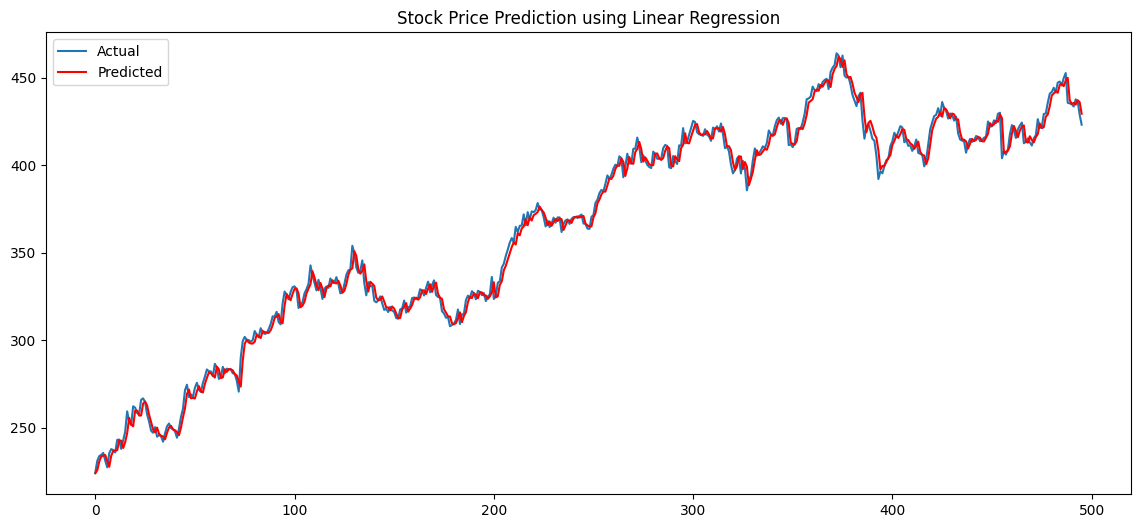

In [29]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.title("Stock Price Prediction using Linear Regression")
plt.show()